In [ ]:
from google.colab import drive
drive.mount ("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
#Read training data file
trainfile = r"/content/drive/MyDrive/CIS508/Santander/train.csv" 
trainData = pd.read_csv(trainfile) 

#Read test data file
testfile = r'/content/drive/MyDrive/CIS508/Santander/test.csv'
testData = pd.read_csv(testfile)



Exploratory Data Analysis

In [ ]:
#EDA - trainData set Review
trainData.head() 

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
trainData.info()
trainData.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
trainData.isnull().sum().sum()

0

In [ ]:
trainData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec62adec50>]],
      dtype=object)

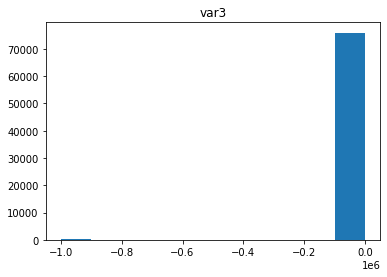

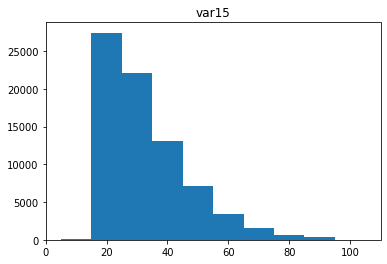

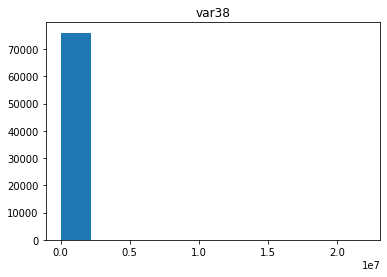

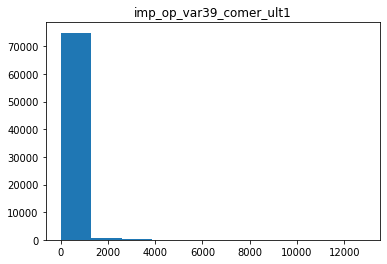

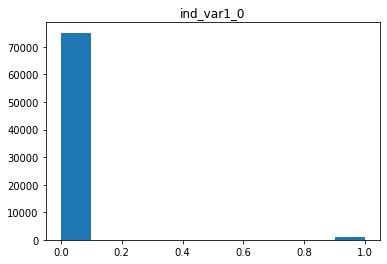

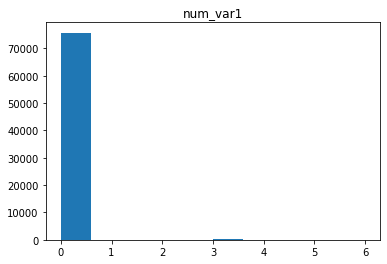

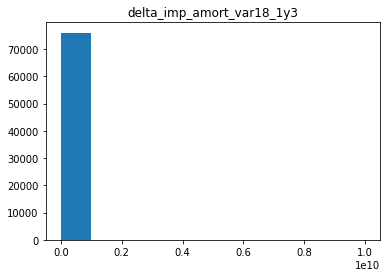

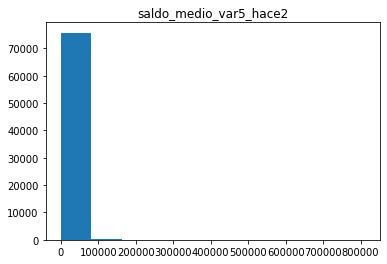

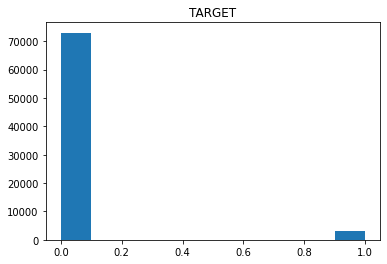

In [ ]:
#EDA - Review specific data Column 
trainData.hist(column='var3',grid=False)
trainData.hist(column='var15',grid=False)
trainData.hist(column='var38',grid=False)
trainData.hist(column='imp_op_var39_comer_ult1',grid=False)
trainData.hist(column='ind_var1_0',grid=False)
trainData.hist(column='num_var1',grid=False)
trainData.hist(column='delta_imp_amort_var18_1y3',grid=False)
trainData.hist(column='saldo_medio_var5_hace2',grid=False)
trainData.hist(column='TARGET',grid=False)


In [ ]:
trainData['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [ ]:
trainData['var15'].value_counts()

23     20170
24      6232
25      4217
26      3270
27      2861
       ...  
97         3
104        2
98         1
105        1
101        1
Name: var15, Length: 100, dtype: int64

In [ ]:
trainData['delta_imp_amort_var18_1y3'].value_counts()

0             76018
9999999999        2
Name: delta_imp_amort_var18_1y3, dtype: int64

In [ ]:
trainData['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [ ]:
#EDA - testData set Review
testData. head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
testData.info()
testData.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    0
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
Length: 370, dtype: int64

In [ ]:
trainData.isnull().sum().sum()

In [ ]:
testData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.00000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04,7.581800e+04,7.581800e+04,7.581800e+04,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04,75818.000000,7.581800e+04,75818.000000,75818.000000,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,3.635893,69.734376,115.469593,67.439982,110.967136,137.214620,67.910627,111.63958,140.850513,4.917151,0.012108,0.003917,0.0,0.0,0.957002,0.663747,0.000092,0.000026,0.033686,0.029887,0.068612,0.045359,0.053206,0.043486,0.042154,0.010763,0.010578,0.000066,0.000066,0.051874,...,902.370806,1056.867678,1060.014504,60.764337,9.361781,118.186622,104.805798,4.359742e+03,7.048762e+02,6.059647e+03,4.745336e+03,3581.184666,501.124806,4909.473875,3869.986824,8.167134e+02,176.592698,9.869169e+02,771.302026,0.199158,0.0,1.218142,0.708650,36.323577,6.204746,57.528068,47.688547,0.138711,0.0,0.195140,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,129.089127,330.563913,540.054605,517.066406,726.368848,697.823263,521.377495,732.61944,717.878305,322.535540,0.109369,0.062466,0.0,0.0,0.202853,0.472430,0.009608,0.005136,0.180421,0.170278,0.252794,0.208091,0.224446,0.203949,0.200941,0.103184,0.102304,0.008121,0.008121,0.221775,...,7477.578055,9787.585269,8138.430011,1697.257696,510.104537,2240.333363,1815.886791,4.549291e+04,1.184441e+04,5.116131e+04,4.000231e+04,25634

Data Pre-processing

In [ ]:
#Data_preprocessing
is_1 = trainData['TARGET'] == 'Dissatisfaction'
Dissatisfaction = trainData[is_1]
trainCols = list(Dissatisfaction.columns.values)
print(trainCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
trainData_copy = trainData [['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var13', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_var39_hace3', 'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var35', 'num_var37_med_ult2', 'num_var37_0', 'num_var37', 'num_var39_0', 'num_var40_0', 'num_var40', 'num_var41_0', 'num_var41', 'num_var39', 'num_var42_0', 'num_var42', 'num_var44_0', 'num_var44', 'num_var46_0', 'num_var46', 'saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var18', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var28', 'saldo_var27', 'saldo_var29', 'saldo_var30', 'saldo_var31', 'saldo_var32', 'saldo_var33', 'saldo_var34', 'saldo_var37', 'saldo_var40', 'saldo_var41', 'saldo_var42', 'saldo_var44', 'saldo_var46', 'var36', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_aport_var17_hace3', 'imp_aport_var17_ult1', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_compra_var44_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var13_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var17_ult1', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'var21', 'num_var2_0_ult1', 'num_var2_ult1', 'num_aport_var13_hace3', 'num_aport_var13_ult1', 'num_aport_var17_hace3', 'num_aport_var17_ult1', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_var7_recib_ult1', 'num_compra_var44_hace3', 'num_compra_var44_ult1', 'num_ent_var16_ult1', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'num_meses_var13_largo_ult3', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var39_vig_ult3', 'num_meses_var44_ult3', 'num_op_var39_comer_ult1', 'num_op_var39_comer_ult3', 'num_op_var40_comer_ult1', 'num_op_var40_comer_ult3', 'num_op_var40_efect_ult1', 'num_op_var40_efect_ult3', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1', 'num_op_var41_efect_ult3', 'num_op_var39_efect_ult1', 'num_op_var39_efect_ult3', 'num_reemb_var13_hace3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 'num_reemb_var17_ult1', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_sal_var16_ult1', 'num_var43_emit_ult1', 'num_var43_recib_ult1', 'num_trasp_var11_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var17_in_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_in_ult1', 'num_trasp_var33_out_hace3', 'num_trasp_var33_out_ult1', 'num_venta_var44_hace3', 'num_venta_var44_ult1', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'saldo_var2_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_hace2', 'saldo_medio_var8_hace3', 'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3', 'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_hace3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_largo_ult3', 'saldo_medio_var13_medio_hace2', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var13_medio_ult1', 'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3', 'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38']]
testData_copy = testData[['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var13', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_var39_hace3', 'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var35', 'num_var37_med_ult2', 'num_var37_0', 'num_var37', 'num_var39_0', 'num_var40_0', 'num_var40', 'num_var41_0', 'num_var41', 'num_var39', 'num_var42_0', 'num_var42', 'num_var44_0', 'num_var44', 'num_var46_0', 'num_var46', 'saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var18', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var28', 'saldo_var27', 'saldo_var29', 'saldo_var30', 'saldo_var31', 'saldo_var32', 'saldo_var33', 'saldo_var34', 'saldo_var37', 'saldo_var40', 'saldo_var41', 'saldo_var42', 'saldo_var44', 'saldo_var46', 'var36', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_aport_var17_hace3', 'imp_aport_var17_ult1', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_compra_var44_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var13_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var17_ult1', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'var21', 'num_var2_0_ult1', 'num_var2_ult1', 'num_aport_var13_hace3', 'num_aport_var13_ult1', 'num_aport_var17_hace3', 'num_aport_var17_ult1', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_var7_recib_ult1', 'num_compra_var44_hace3', 'num_compra_var44_ult1', 'num_ent_var16_ult1', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'num_meses_var13_largo_ult3', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var39_vig_ult3', 'num_meses_var44_ult3', 'num_op_var39_comer_ult1', 'num_op_var39_comer_ult3', 'num_op_var40_comer_ult1', 'num_op_var40_comer_ult3', 'num_op_var40_efect_ult1', 'num_op_var40_efect_ult3', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1', 'num_op_var41_efect_ult3', 'num_op_var39_efect_ult1', 'num_op_var39_efect_ult3', 'num_reemb_var13_hace3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 'num_reemb_var17_ult1', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_sal_var16_ult1', 'num_var43_emit_ult1', 'num_var43_recib_ult1', 'num_trasp_var11_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var17_in_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_in_ult1', 'num_trasp_var33_out_hace3', 'num_trasp_var33_out_ult1', 'num_venta_var44_hace3', 'num_venta_var44_ult1', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'saldo_var2_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_hace2', 'saldo_medio_var8_hace3', 'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3', 'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_hace3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_largo_ult3', 'saldo_medio_var13_medio_hace2', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var13_medio_ult1', 'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3', 'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38']]

In [ ]:
trainCols = list(trainData_copy.columns.values)
testCols = list(testData_copy.columns.values)
print(trainCols)
print(testCols)

['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'i

In [ ]:
X_Train = trainData_copy
X_Test = testData_copy


In [ ]:
Y_Train = trainData.iloc[:, -1] 


Data Modeling 

In [ ]:
#model fitting : Reduce Data Impurity
param_grid = {
    "min_impurity_decrease": [0.01,0.001,0.0001,0.00001],
    "ccp_alpha":[0.01,0.001,0.0001,0.00001]
}

clf = DecisionTreeClassifier(random_state=17)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=2).fit(X_Train, Y_Train)

print("Param", grid_cv.best_params_)
print("CV score", grid_cv.best_score_)

Param {'ccp_alpha': 0.0001, 'min_impurity_decrease': 1e-05}
CV score 0.8059098881370128


In [ ]:
#model fitting : Ptuning for reduce Overfitting
param_grid = {
    "max_depth": [1,3,5,10,30,50,None],
    "min_samples_split": [1,2,5,7,10],
    "min_samples_leaf": [1,2,5,10,100]
}

clf = DecisionTreeClassifier(random_state=17)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_Train, Y_Train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 2}
CV score for GS 0.8178521591492022


In [ ]:
#Decision Tree Medeling
clf=DecisionTreeClassifier(min_impurity_decrease=1e-05, class_weight='balanced', ccp_alpha=0.0001, max_depth= 5, min_samples_leaf= 100, min_samples_split= 2)

clf.fit(X_Train,Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=1e-05,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
X_Pred_train = clf.predict(X_Train) 
print("TRAIN Accuracy:", accuracy_score(Y_Train,X_Pred_train)) 

TRAIN Accuracy: 0.7538542488818732


In [ ]:
#prediction result
pred = clf.predict(X_Test)

In [ ]:
SantanderModel = pd.DataFrame ({
    'ID':testData['ID'],
    'TARGET': pred
})

SantanderModel.to_csv('/content/drive/MyDrive/CIS508/Santander/SantanderModel.csv', index=False) 

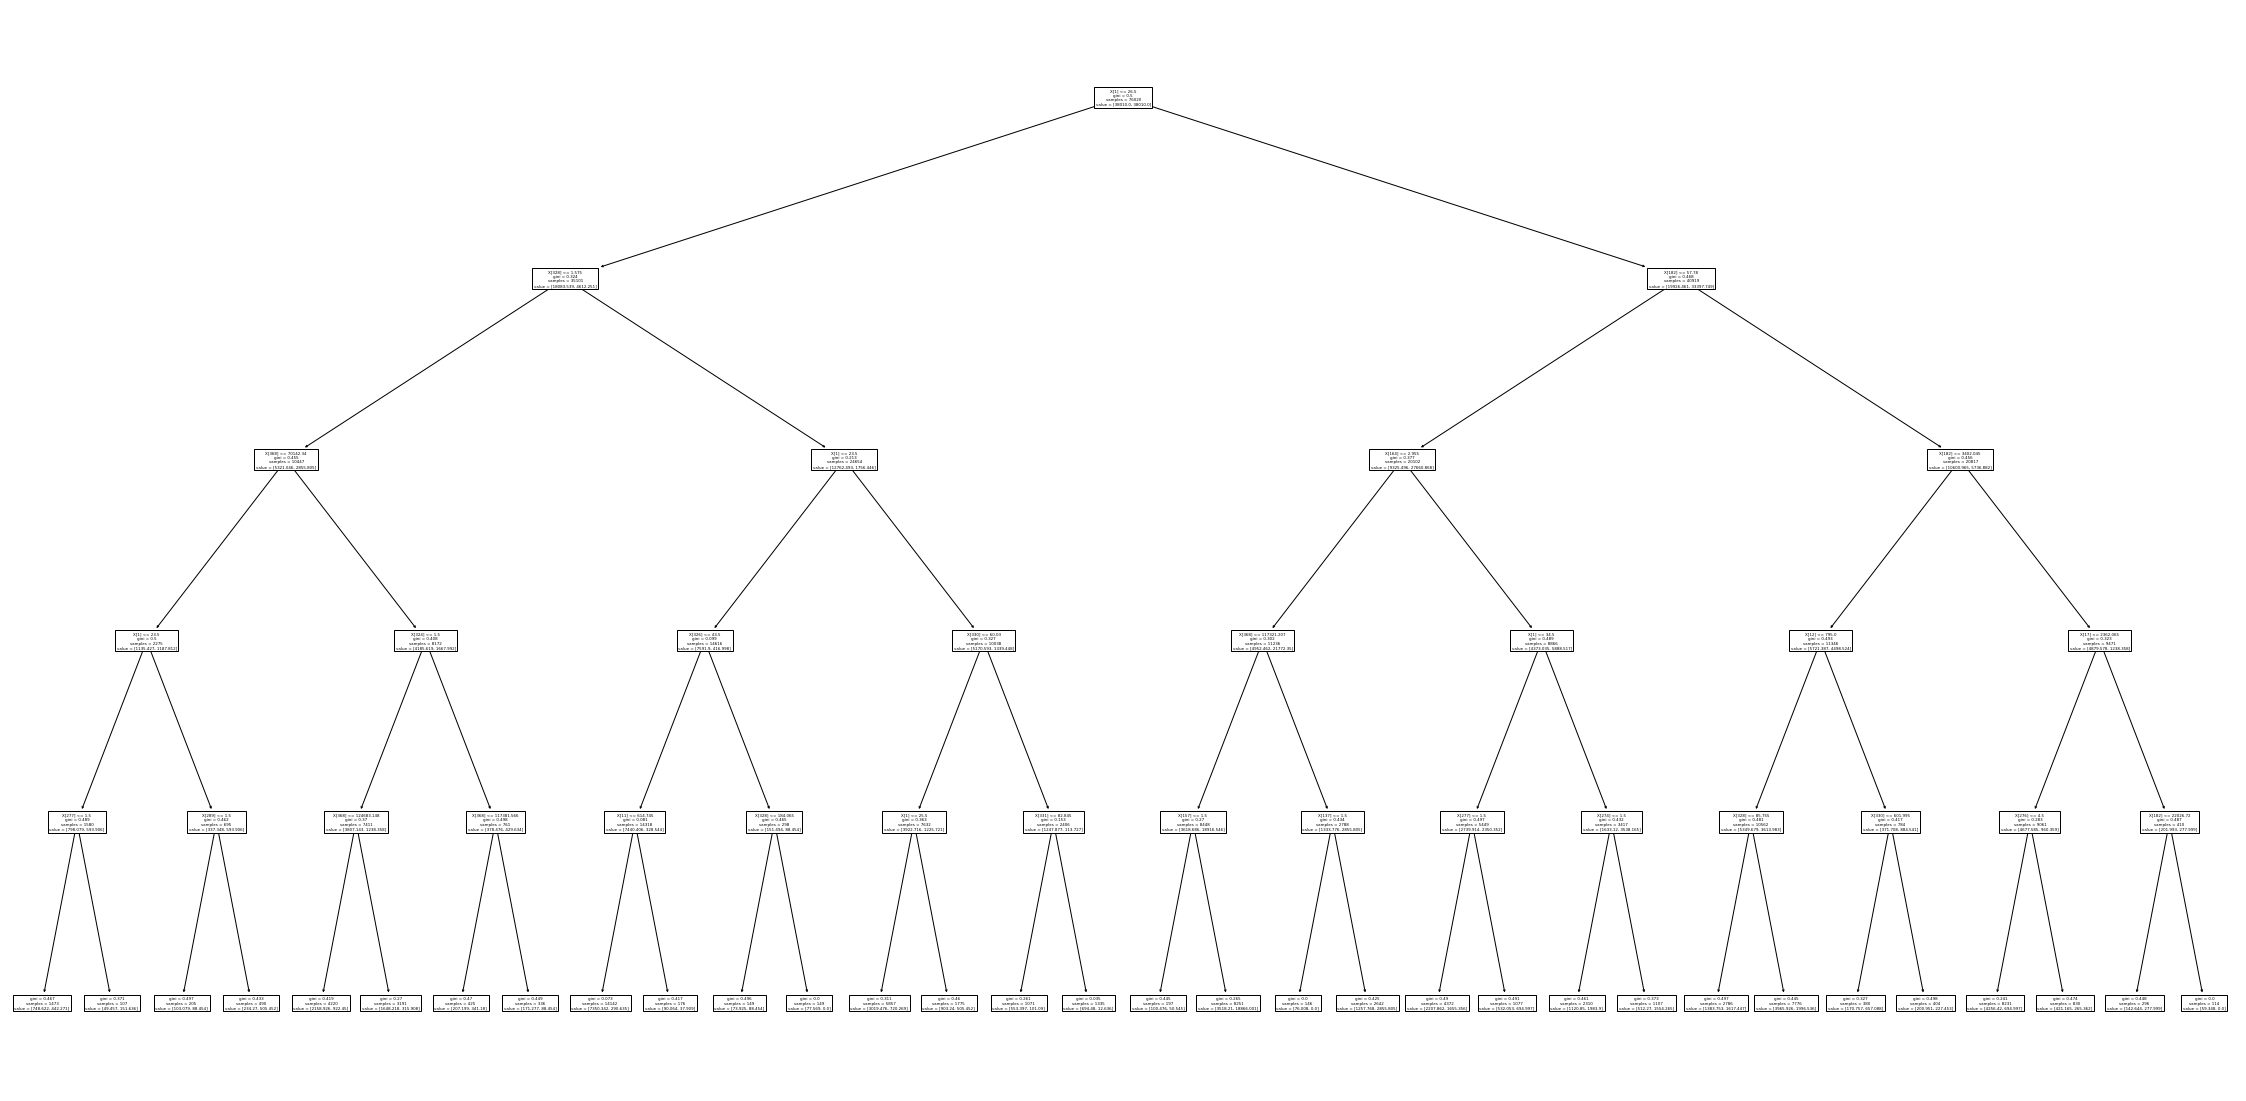

In [ ]:
#Visualize decision tree

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf)